# Predicción de Intención de Compra Online con Amazon SageMaker

## Descripción del Problema

En el entorno altamente competitivo del comercio electrónico, anticipar el comportamiento del usuario puede marcar la diferencia entre una visita casual y una venta concreta. Las empresas buscan cada vez más apoyarse en técnicas de inteligencia artificial para **predecir si un visitante realizará una compra durante su sesión en línea**, basándose en su comportamiento de navegación y características técnicas.

Este proyecto aborda este desafío desarrollando un modelo de machine learning capaz de **predecir la intención de compra de un usuario**, basándose en datos históricos recolectados durante sesiones en un sitio web de e-commerce.

### Objetivo del Proyecto
Construir un modelo de clasificación binaria que, a partir de información observada durante una sesión web, **prediga si el usuario finalizará o no una compra** (`Revenue = 1` o `0`), permitiendo así anticipar decisiones comerciales, personalizar campañas y optimizar recursos de marketing.

### Dataset Utilizado
Se emplea el **Online Shoppers Purchasing Intention Dataset**, proveniente del UCI Machine Learning Repository, que contiene más de 12,000 registros de sesiones de usuarios.

Las variables incluidas abarcan:

- **Variables numéricas**:  
  - *Administrative_Duration*, *ProductRelated_Duration*, *BounceRates*, *ExitRates*, *PageValues*, entre otras.  
  - Estas variables se normalizan para su uso en el modelo.

- **Variables categóricas**:  
  - *Month*, *VisitorType*, *Browser*, *OperatingSystems*, *Region*, *TrafficType*  
  - Estas se codifican mediante técnicas como One-Hot Encoding.

- **Variables binarias**
  - `Weekend` (booleano)  
  - `Revenue` (etiqueta objetivo)  

### Tipo de Problema
Este es un problema de **clasificación binaria supervisada**, donde se entrena un modelo para predecir una variable objetivo binaria (`Revenue`) basada en un conjunto mixto de características numéricas y categóricas.


## Metodología
Se desarrolló un flujo completo de machine learning en Amazon SageMaker, abarcando las siguientes etapas:

1. **Adquisición de Datos:**
   - Se seleccionó el dataset y se subió a un bucket de Amazon S3.

2. **Preprocesamiento:**
   - Limpieza de datos
   - Codificación de variables categóricas con OneHotEncoder
   - Normalización de características numéricas con MinMaxScaler
   - Análisis exploratorio de datos (EDA)
   - Cálculo de importancia de características con `RandomForestClassifier`

3. **Entrenamiento del Modelo:**
   - Se utilizó el algoritmo XGBoost integrado de SageMaker
   - División del conjunto de datos en 70% entrenamiento y 30% prueba

4. **Ajuste de Hiperparámetros:**
   - Se utilizó `HyperparameterTuner` de SageMaker
   - Métrica objetivo: AUC (Area Under the ROC Curve)

5. **Despliegue del Modelo:**
   - Se implementó un endpoint en SageMaker para predicciones en tiempo real.

In [1]:
pip install sagemaker

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sagemaker_datawrangler

  Using cached sagemaker_datawrangler-0.4.3-py3-none-any.whl.metadata (667 bytes)
  Using cached sagemaker_data_insights-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached ipywidgets-7.8.5-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached sagemaker_scikit_learn_extension-2.5.0-py3-none-any.whl
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata (755 bytes)
  Using cached widgetsnbextension-3.6.10-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached jupyterlab_widgets-1.1.11-py3-none-any.whl.metadata (3.7 kB)
Using cached sagemaker_datawrangler-0.4.3-py3-none-any.whl (10.6 MB)
Using cached sagemaker_data_insights-0.4.0-py3-none-any.whl (99 kB)
Using cached ipywidgets-7.8.5-py2.py3-none-any.whl (124 kB)
Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
Using cached jupyterlab_widgets-1.1.11-py3-none-any.whl (246 kB)
Using cached widgetsnbextension-3.6.10-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: jupyterlab-widgets
    Found existing in

In [3]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade ipywidgets

  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 1.1.11
    Uninstalling jupyterlab_widgets-1.1.11:
      Successfully uninstalled jupyterlab_widgets-1.1.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.8.5
    Uninstalling ipywidgets-7.8.5:
      Successfully uninstalled ipywidgets-7.8.5
ERROR: pip's dependen

In [5]:
# Importación de librerías
import sagemaker_datawrangler           # Para la preparación interactiva de datos
import numpy as np                      # Para operaciones numéricas y matrices
import pandas as pd   
import seaborn as sns                  # Para manejo de datos tabulares
import matplotlib.pyplot as plt         # Para visualización de datos
from IPython.display import display     # Para mostrar resultados en el notebook
import sys, os, math, json, re          # Manejo de archivos, JSON, expresiones regula
from time import gmtime, strftime       # Para etiquetado de modelos en SageMaker
import boto3                             # Para interacción con AWS
import sagemaker                         # Para trabajar con SageMaker
from sagemaker import get_execution_role, Session
from sagemaker.processing import ProcessingInput, ProcessingOutput
from sagemaker.sklearn.processing import SKLearnProcessor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sagemaker.inputs import TrainingInput
from sagemaker.xgboost.estimator import XGBoost
from imblearn.over_sampling import SMOTE
from sagemaker_pipeline import pipeline  

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [6]:
# Definir el bucket
session = sagemaker.Session()
bucket = session.default_bucket()  # Obtiene el bucket por defecto
prefix = "trabajofinalmlops" 

In [7]:
bucket

'sagemaker-us-east-1-238988738418'

In [8]:
# Define IAM role
role = get_execution_role()
role

'arn:aws:iam::238988738418:role/service-role/AmazonSageMaker-ExecutionRole-20250408T110469'

In [9]:
input_source = session.upload_data('./online_shoppers_intention.csv', bucket=bucket, key_prefix=f'{prefix}/input_data')
input_source

's3://sagemaker-us-east-1-238988738418/trabajofinalmlops/input_data/online_shoppers_intention.csv'

In [10]:
# Definir rutas de salida en S3
train_path = f"s3://{bucket}/{prefix}/train"
validation_path = f"s3://{bucket}/{prefix}/validation"
test_path = f"s3://{bucket}/{prefix}/test"

# EDA

In [11]:
df = pd.read_csv(input_source)

In [12]:
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())

Shape: (12330, 18)
Columnas: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [13]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [14]:
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


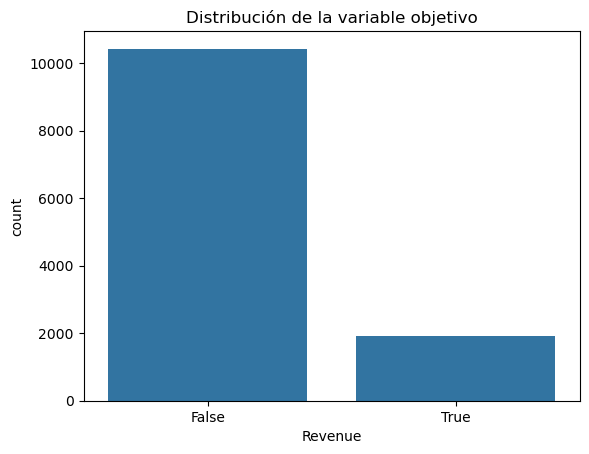

In [15]:
sns.countplot(data=df, x='Revenue')
plt.title('Distribución de la variable objetivo')
plt.show()

In [16]:
# Variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", cat_cols)

Variables categóricas: ['Month', 'VisitorType']


In [17]:
#  Variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", num_cols)

Variables numéricas: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [18]:
#  Codificación rápida para Feature Importance
df_encoded = df.copy()

for col in cat_cols:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)
    else:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [19]:
#  Separar X e y
X = df_encoded.drop(columns='Revenue')
y = df_encoded['Revenue'].astype(int)

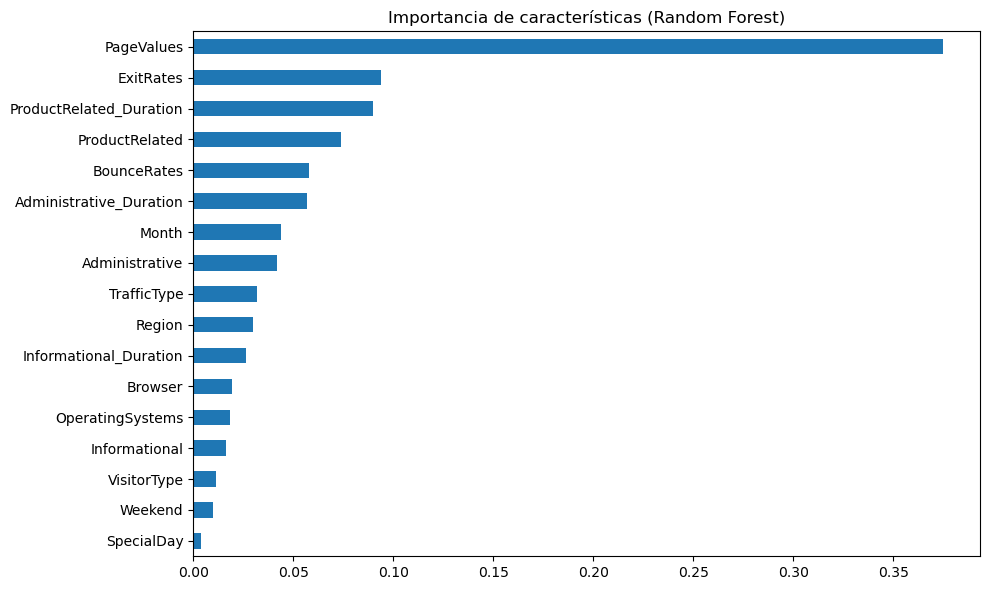

In [20]:
#  Entrenamiento rápido para obtener feature importance
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Importancia de características (Random Forest)')
plt.tight_layout()
plt.show()

# Ejecución de pipeline

In [24]:
# Crear o actualizar el pipeline
role = get_execution_role()
pipeline.upsert(role_arn=role)

# Ejecutar pipeline
execution = pipeline.start()
execution.wait()

steps = execution.list_steps()

for step in steps:
    print(f"\n🔹 Paso: {step['StepName']} - Estado: {step['StepStatus']}")
    metadata = step.get("Metadata", {})
    processing_job = metadata.get("ProcessingJob", {})
    output_config = processing_job.get("OutputConfig", {})
    outputs = output_config.get("Outputs", [])

    for out in outputs:
        output_name = out.get("OutputName")
        s3_uri = out.get("S3Output", {}).get("S3Uri")
        if output_name and s3_uri:
            print(f"  🔸 {output_name}: {s3_uri}")
            
            # Si es la salida de evaluación, extraer bucket y prefix
            if output_name == "evaluation":
                bucket_name = s3_uri.replace("s3://", "").split("/")[0]
                key_prefix = "/".join(s3_uri.replace("s3://", "").split("/")[1:])


🔹 Paso: EvaluateModel - Estado: Succeeded

🔹 Paso: RegisterXGBoostModel-RegisterModel - Estado: Succeeded

🔹 Paso: TrainXGBoostModel - Estado: Succeeded

🔹 Paso: PreprocessData - Estado: Succeeded
